# Netflix -Team 1


### Introduction
Given the Netflix titles dataset with the following column titles:

* show_id
* type
* title
* director
* cast
* country
* date_added
* release_year
* rating
* duration
* listed_in
* description

### We aim to obtain the following information/relationships from our dataset:

#### Country-based analysis
We will analyze the distribution of content by country of production to understand Netflix's international content selection. This can be done by counting the number of titles in each country and plotting the results. We can also look at the average rating and duration of titles in each country.
#### Genre analysis
We will analyze the distribution of content by genre using the listed_in column to identify the most popular genres on Netflix. This can be done by counting the number of titles in each genre and plotting the results. We can also look at the average rating and duration of titles in each genre.
#### Director insights
We will explore the works of different directors, finding out which directors have the most content on Netflix, or analyzing the popularity of content by specific directors. This can be done by counting the number of titles directed by each director and plotting the results. We can also look at the average rating and duration of titles directed by each director

In [1]:
import numpy as np
import pandas as pd

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


### Importing data set for data wrangling

In [1]:
import pandas as pd

netflix_titles = "/Users/ngokoana/Downloads/netflix_titles.csv"
df = pd.read_csv(netflix_titles)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Country-based analysis
Here we will analyze the distribution of content by country of production to understand Netflix's international content selection.

analyses here shows that over between the years 2013 - 2021, the countithe Unites states, India, UK have the most content added on Netflix 

In [4]:
import pandas as pd
netflix_titles = "/Users/ngokoana/Downloads/netflix_titles.csv"
df = pd.read_csv(netflix_titles)

def get_top_countries(df):
    df['country'] = df['country'].str.split(', ')
    df = df.explode('country')
    count_per_country = df.groupby('country')['show_id'].nunique()

    count_per_country = count_per_country.sort_values(ascending= False)
    top_countries = count_per_country.head(20)
    
    return(top_countries)

In [5]:
top_countries = get_top_countries(df)
print(top_countries)

country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Nigeria            103
Italy              100
Brazil              97
Argentina           91
Indonesia           90
Name: show_id, dtype: int64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
netflix_titles = "/Users/ngokoana/Downloads/netflix_titles.csv"
df = pd.read_csv(netflix_titles)

def get_top_countries(df):
    df['country'] = df['country'].str.split(', ')
    df = df.explode('country')
    count_per_country = df.groupby('country')['show_id'].nunique()

    count_per_country = count_per_country.sort_values(ascending= False)
    top_countries = count_per_country.head(20)


    plt.figure(figsize=(16, 8))  # Adjust the figure size as needed
    top_countries.plot(kind='bar', color='skyblue')
    plt.title('Number of Shows on Netflix by Country')
    plt.xlabel('Country')
    plt.ylabel('Number of Shows')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()

# Display the graph
    plt.show()

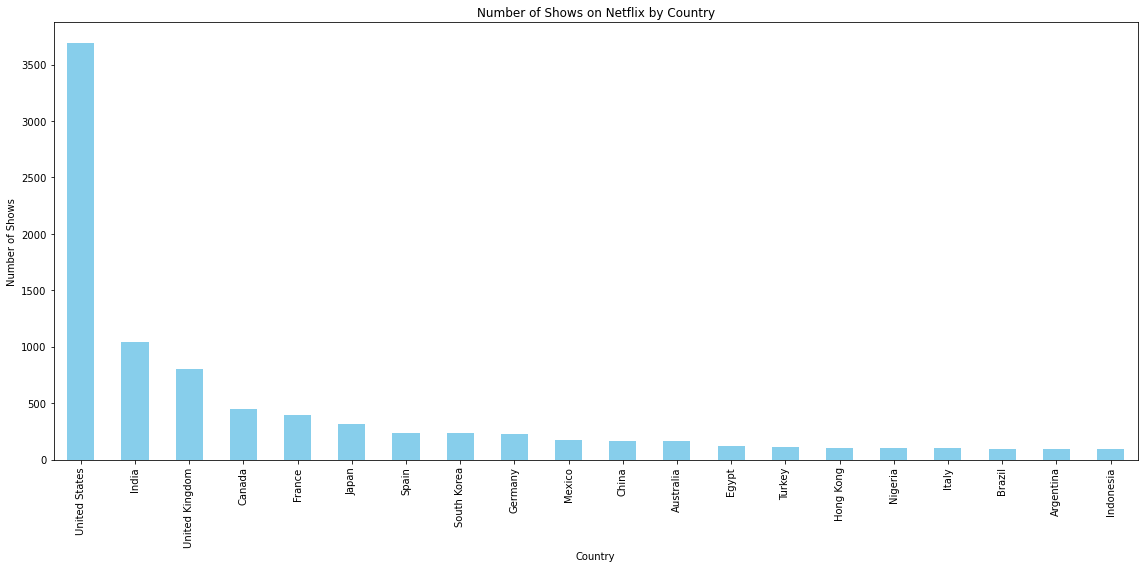

In [15]:
get_top_countries(df)

In [9]:
def usa_genre(df):
    usa_data = df[df['country'] == 'United States']  # Filter for movies/shows in the USA
    genres = usa_data['listed_in'].str.split(', ').explode()  # Explode the genres into separate rows
    show_ids = usa_data['show_id']  # Get the show_ids for each genre
    genre_counts = pd.DataFrame({'show_id': show_ids, 'genre': genres})  # Create a DataFrame with show_id and genre
    genre_counts = genre_counts.groupby('genre')['show_id'].count().reset_index()  # Count the number of shows for each genre
    
    print(f"Number of shows/movie per genre in the USA:")
    print(genre_counts)

# Call the function
usa_genre(df) 

Number of shows/movie per genre in the USA:
Empty DataFrame
Columns: [genre, show_id]
Index: []


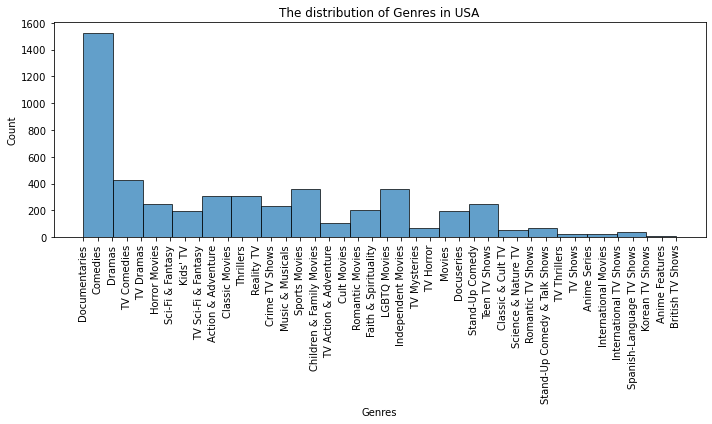

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read your dataset (replace with the actual file path)
netflix_titles = "/Users/ngokoana/Downloads/netflix_titles.csv"
df = pd.read_csv("netflix_titles.csv")

def usa_genre(df):
    usa_data = df[df['country'] == 'United States']  # Filter for movies/shows in the USA
    genres = usa_data['listed_in'].str.split(', ').explode()  # Explode the genres into separate rows

    # Create a histogram for genre distribution
    plt.figure(figsize=(10, 6))
    plt.hist(genres, bins=20, edgecolor='black', alpha=0.7)
    plt.title('The distribution of Genres in USA')
    plt.xlabel('Genres')
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()
usa_genre(df)


In [4]:
import pandas as pd

# Read your Netflix dataset (replace with the actual file path)
netflix_df = pd.read_csv("netflix_titles.csv")

# Step 2: Filter for United States
usa_shows = netflix_df[netflix_df['country'] == 'United States']

# Step 3: Split Directors (assuming the "director" column contains multiple directors separated by comma and space)
usa_directors = usa_shows['director'].str.split(', ').explode()

# Step 4: Count Directors
director_counts = usa_directors.value_counts()

# Step 5: Find Most Recurring Directors (e.g., top 10)
top_directors = director_counts.head(10)

# Print the top recurring directors
print("Top Recurring Directors in Shows from the United States:")
print(top_directors)

Top Recurring Directors in Shows from the United States:
Marcus Raboy       15
Jay Karas          15
Jay Chapman        12
Shannon Hartman     9
Martin Scorsese     8
Troy Miller         8
Ryan Polito         8
Lance Bangs         7
Leslie Small        7
Michael Simon       6
Name: director, dtype: int64


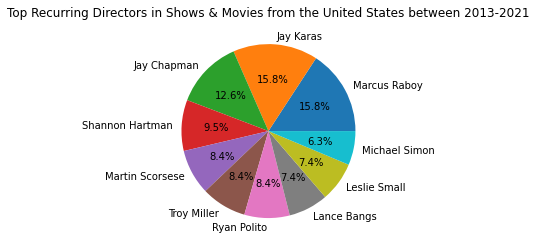

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# Read your Netflix dataset (replace with the actual file path)
netflix_df = pd.read_csv("netflix_titles.csv")

# Step 2: Filter for United States
usa_shows = netflix_df[netflix_df['country'] == 'United States']

# Step 3: Split Directors (assuming the "director" column contains multiple directors separated by comma and space)
usa_directors = usa_shows['director'].str.split(', ').explode()

# Step 4: Count Directors
director_counts = usa_directors.value_counts()

# Step 5: Find Most Recurring Directors (e.g., top 10)
top_directors = director_counts.head(10)
plt.pie(top_directors.values, labels=top_directors.index, autopct="%1.1f%%")
plt.title("Top Recurring Directors in Shows & Movies from the United States between 2013-2021")
plt.show()